In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* id 고유 id
* hour 시간
* temperature 기온
* precipitation 비가 오지 않았으면 0, 비가 오면 1
* windspeed 풍속(평균)
* humidity 습도
* visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone 오존
* pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count 시간에 따른 따릉이 대여 수


[대회링크](https://dacon.io/competitions/open/235576/data)

*  평가 산식 : RMSE

In [3]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/submission.csv')

## 데이터 둘러보기


In [ ]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [ ]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [ ]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [ ]:
train.shape, test.shape

((1459, 11), (715, 10))

## 결측값 및 전처리

In [4]:
# id값 처리
train = train.drop('id',axis=1)
test_id = test.pop('id')


In [ ]:
train.isnull().sum()

,0
hour,0
hour_bef_temperature,2
hour_bef_precipitation,2
hour_bef_windspeed,9
hour_bef_humidity,2
hour_bef_visibility,2
hour_bef_ozone,76
hour_bef_pm10,90
hour_bef_pm2.5,117
count,0


In [ ]:
train.isnull().sum()

,0
hour,0
hour_bef_temperature,0
hour_bef_precipitation,0
hour_bef_windspeed,0
hour_bef_humidity,0
hour_bef_visibility,0
hour_bef_ozone,0
hour_bef_pm10,0
hour_bef_pm2.5,0
count,0


In [ ]:
test.isnull().sum()

,0
hour,0
hour_bef_temperature,1
hour_bef_precipitation,1
hour_bef_windspeed,1
hour_bef_humidity,1
hour_bef_visibility,1
hour_bef_ozone,35
hour_bef_pm10,37
hour_bef_pm2.5,36


In [ ]:
test = test.fillna(0)

In [ ]:
train.corr()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,1.000000,0.405553,0.021708,0.462188,-0.326464,0.176760,0.450612,0.062749,0.055543,0.626047
hour_bef_temperature,0.405553,1.000000,-0.095598,0.376715,-0.479358,0.205710,0.510923,0.019943,0.000521,0.619277
hour_bef_precipitation,0.021708,-0.095598,1.000000,0.024509,0.275869,-0.215696,-0.059354,-0.058610,-0.013009,-0.163580
hour_bef_windspeed,0.462188,0.376715,0.024509,1.000000,-0.417761,0.248713,0.491084,0.021566,-0.135292,0.458547
hour_bef_humidity,-0.326464,-0.479358,0.275869,-0.417761,1.000000,-0.578853,-0.392145,-0.101618,0.092388,-0.464890
hour_bef_visibility,0.176760,0.205710,-0.215696,0.248713,-0.578853,1.000000,0.097932,-0.339860,-0.485773,0.301195
hour_bef_ozone,0.450612,0.510923,-0.059354,0.491084,-0.392145,0.097932,1.000000,0.217722,0.168936,0.479579
hour_bef_pm10,0.062749,0.019943,-0.058610,0.021566,-0.101618,-0.339860,0.217722,1.000000,0.558211,-0.066773
hour_bef_pm2.5,0.055543,0.000521,-0.013009,-0.135292,0.092388,-0.485773,0.168936,0.558211,1.000000,-0.057918
count,0.626047,0.619277,-0.163580,0.458547,-0.464890,0.301195,0.479579,-0.066773,-0.057918,1.000000


In [ ]:
# target
# target = train.pop('count')

##시각화

In [ ]:
# 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1459 non-null   float64
 2   hour_bef_precipitation  1459 non-null   float64
 3   hour_bef_windspeed      1459 non-null   float64
 4   hour_bef_humidity       1459 non-null   float64
 5   hour_bef_visibility     1459 non-null   float64
 6   hour_bef_ozone          1459 non-null   float64
 7   hour_bef_pm10           1459 non-null   float64
 8   hour_bef_pm2.5          1459 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [ ]:
train_copy = train.copy()
train_copy = train_copy.drop('count',axis=1)
hour_bef_precipitation = train_copy.pop('hour_bef_precipitation')

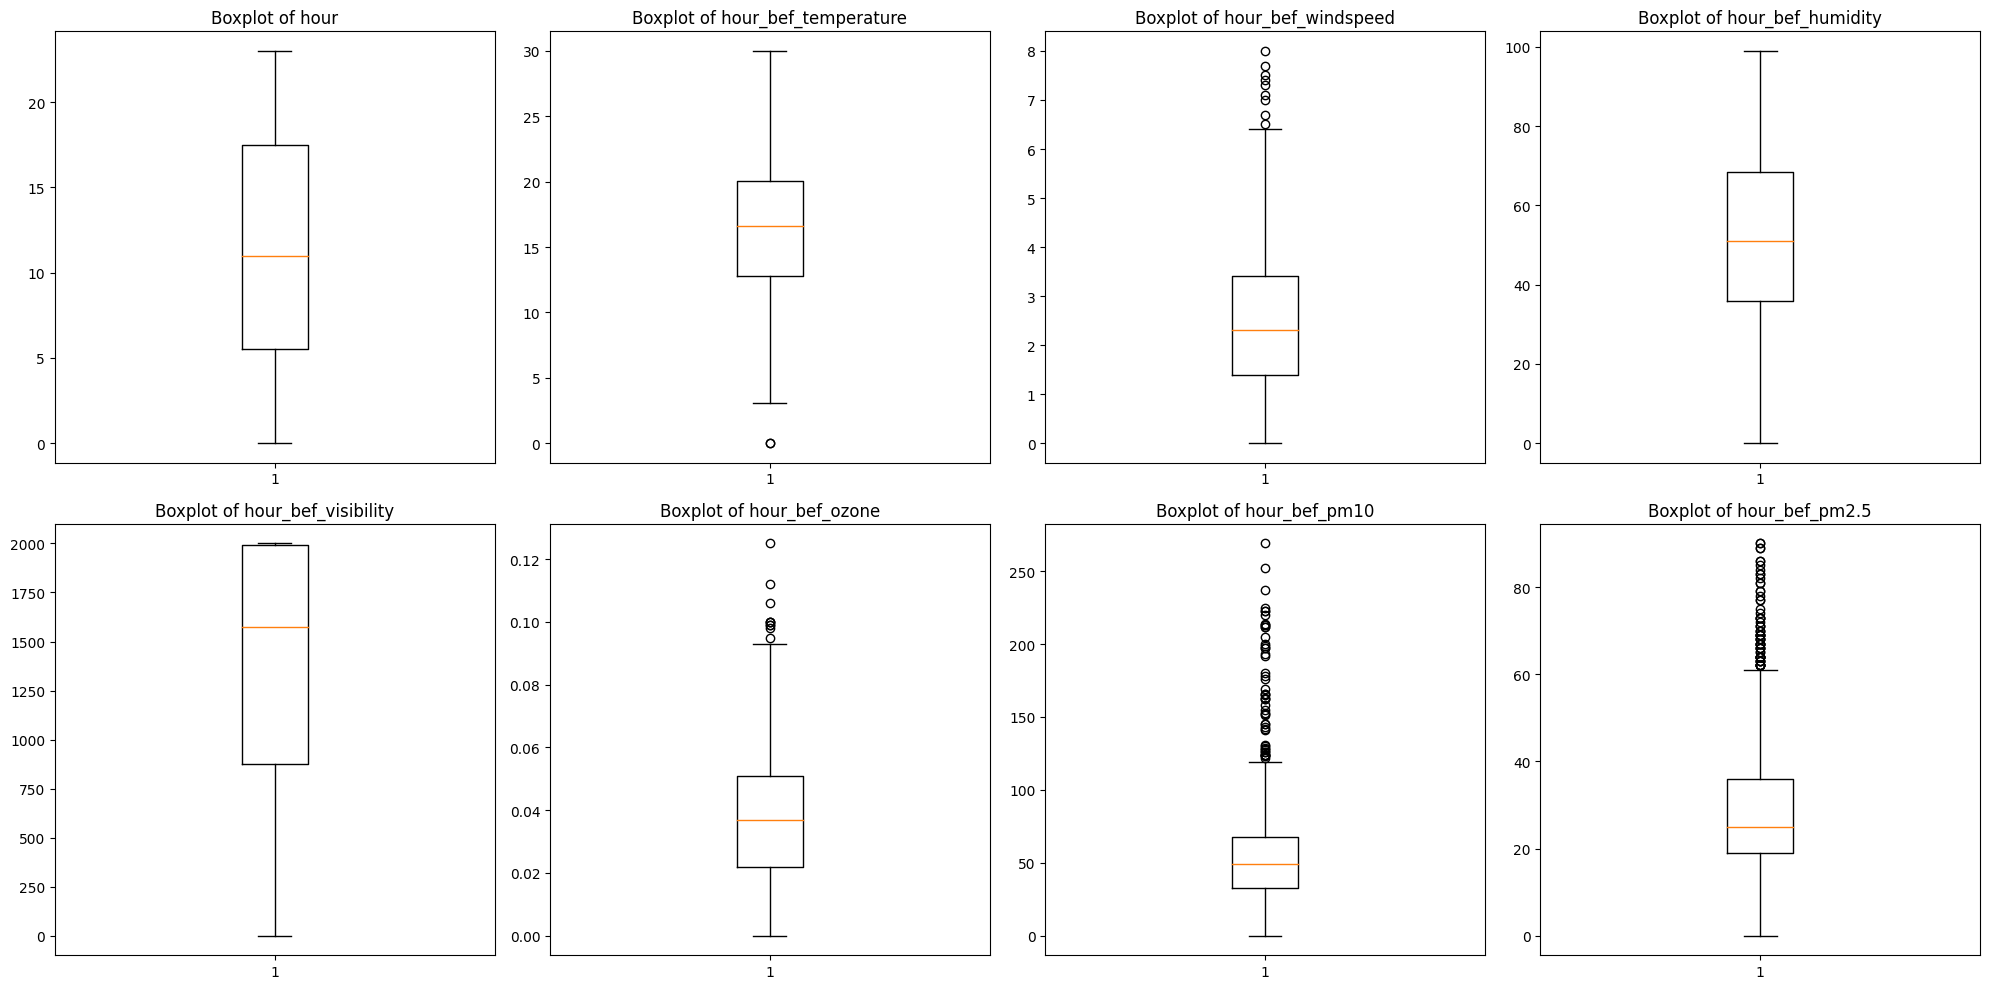

In [ ]:
# Subplot을 위한 figure와 axes 객체 생성
plt.figure(figsize=(20, 10))

# 각 컬럼에 대한 박스플롯 생성
for i, col in enumerate(train_copy.columns):
    plt.subplot(2,4, i + 1)
    plt.boxplot(train_copy[col])
    plt.title(f'Boxplot of {col}')
    # plt.set_xlabel('Column')
    # plt.set_ylabel('Value')

# 그래프 간 간격 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

## 전처리

In [ ]:
# train = train.drop('hour_bef_pm2.5',axis=1)

In [ ]:
# target
target = train.pop('count')

In [ ]:
# StandatdScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(train, target, test_size=0.2, random_state=110)
x_tr.shape,x_val.shape,y_tr.shape,y_val.shape

((1167, 9), (292, 9), (1167,), (292,))

## 모델 예측및 평가

In [ ]:
# 평가 라이브러리 및 함수
from sklearn.metrics import mean_squared_error
def rmse(y_val,pred):
    return mean_squared_error(y_val,pred)**0.5

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)
pred = lr.predict(x_val)

print(rmse(y_val, pred))


50.95171035909674


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=2023)
rf.fit(x_tr,y_tr)
pred = rf.predict(x_val)

print(rmse(y_val, pred))

37.93677530119462


In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(x_tr,y_tr)
pred = lgbm.predict(x_val)

print(rmse(y_val, pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 9
[LightGBM] [Info] Start training from score 107.768638
38.76997765885827


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_tr,y_tr)
pred = xgb.predict(x_val)

print(rmse(y_val, pred))

41.12896245098606


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.linear_model import Ridge
# rmse_scorer = make_scorer(rmse, greater_is_better=False)

# # RandomForest 회귀 모델
# # 랜덤 포레스트 회귀 모델 정의
# model = RandomForestRegressor(random_state=42)

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 4, 6, 8],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmse_scorer, cv=5, n_jobs=-1, verbose=2)

# # 데이터로 GridSearchCV 실행
# grid_search.fit(x_tr,y_tr)

# # 최적의 파라미터와 성능 확인
# print("최적의 파라미터:", grid_search.best_params_)
# print("최적의 RMSE:", (-grid_search.best_score_))